In [5]:
import sklearn
import numpy as np
import os


import seaborn as sns

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


PROJECT_ROOT_DIR = "/Users/jeffreymullahey/Documents/GitHub/dataiku_census_project/dataiku_census_project/"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import pandas as pd

df = pd.read_csv(PROJECT_ROOT_DIR + "census_income_learn_jcm.csv")
df.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,target
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   age                                        199523 non-null  int64  
 1   class_of_worker                            199523 non-null  object 
 2   detailed_industry_recode                   199523 non-null  int64  
 3   detailed_occupation_recode                 199523 non-null  int64  
 4   education                                  199523 non-null  object 
 5   wage_per_hour                              199523 non-null  int64  
 6   enroll_in_edu_inst_last_wk                 199523 non-null  object 
 7   marital_stat                               199523 non-null  object 
 8   major_industry_code                        199523 non-null  object 
 9   major_occupation_code                      199523 non-null  object 
 10  race    

In [74]:
test = pd.read_csv(PROJECT_ROOT_DIR + "census_income_test_jcm.csv")
test.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,target
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,-50000
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,-50000
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,-50000
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,-50000
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,-50000


In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99762 entries, 0 to 99761
Data columns (total 42 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        99762 non-null  int64  
 1   class_of_worker                            99762 non-null  object 
 2   detailed_industry_recode                   99762 non-null  int64  
 3   detailed_occupation_recode                 99762 non-null  int64  
 4   education                                  99762 non-null  object 
 5   wage_per_hour                              99762 non-null  int64  
 6   enroll_in_edu_inst_last_wk                 99762 non-null  object 
 7   marital_stat                               99762 non-null  object 
 8   major_industry_code                        99762 non-null  object 
 9   major_occupation_code                      99762 non-null  object 
 10  race                  

In [3]:
df["target"].value_counts()

-50000     187141
50000+.     12382
Name: target, dtype: int64

In [75]:
test["target"].value_counts()

-50000     93576
50000+.     6186
Name: target, dtype: int64

In [10]:
df.describe()
# continuous variables: age, wage_per_hour, capital_gains, capital_losses, dividends_from_stocks, 
# instance_weight, weeks_worked_in_year

,age,detailed_industry_recode,detailed_occupation_recode,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,instance_weight,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'detailed_industry_recode'}>,
        <AxesSubplot:title={'center':'detailed_occupation_recode'}>,
        <AxesSubplot:title={'center':'wage_per_hour'}>],
       [<AxesSubplot:title={'center':'capital_gains'}>,
        <AxesSubplot:title={'center':'capital_losses'}>,
        <AxesSubplot:title={'center':'dividends_from_stocks'}>,
        <AxesSubplot:title={'center':'instance_weight'}>],
       [<AxesSubplot:title={'center':'num_persons_worked_for_employer'}>,
        <AxesSubplot:title={'center':'own_business_or_self_employed'}>,
        <AxesSubplot:title={'center':'veterans_benefits'}>,
        <AxesSubplot:title={'center':'weeks_worked_in_year'}>],
       [<AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

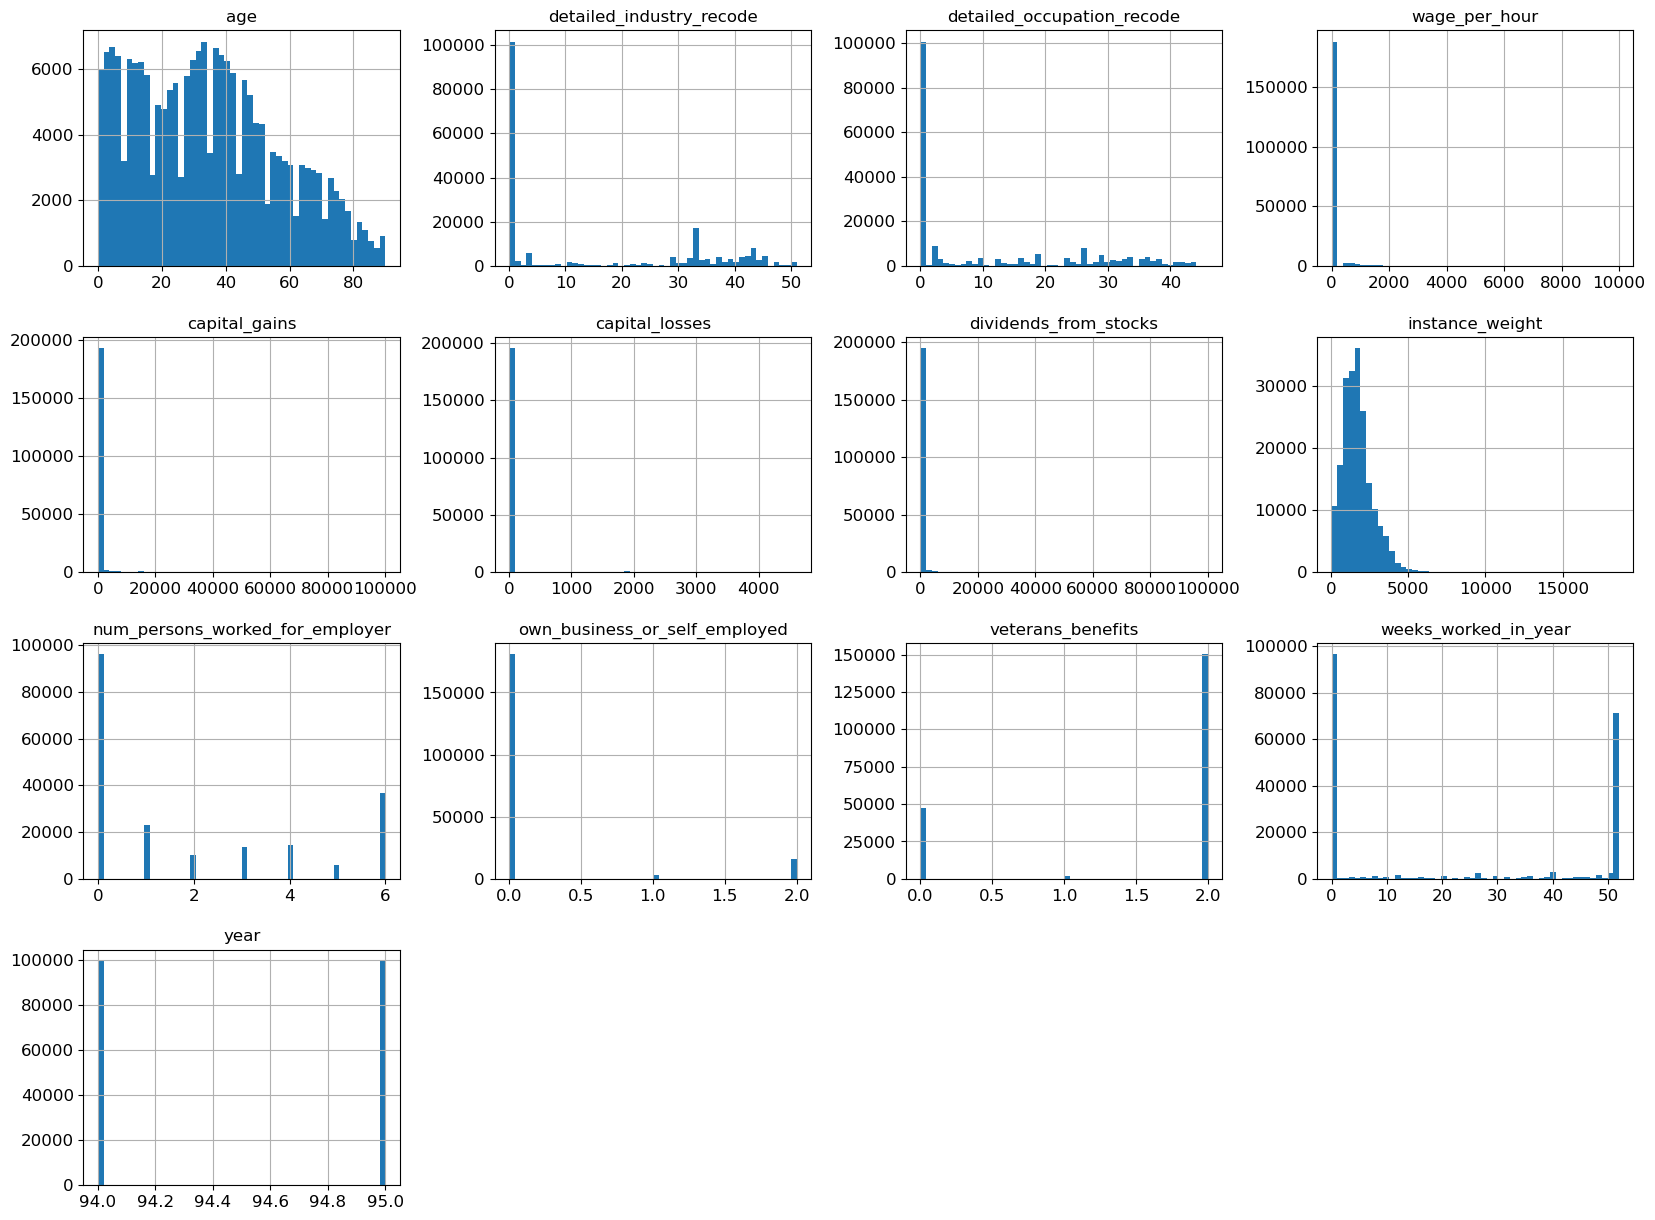

In [9]:
df.hist(bins=50, figsize=(20,15))

In [11]:
df.isin(['Not in universe']).sum()

age                                               0
class_of_worker                              100245
detailed_industry_recode                          0
detailed_occupation_recode                        0
education                                         0
wage_per_hour                                     0
enroll_in_edu_inst_last_wk                   186943
marital_stat                                      0
major_industry_code                               0
major_occupation_code                        100684
race                                              0
hispanic_origin                                   0
sex                                               0
member_of_a_labor_union                      180459
reason_for_unemployment                      193453
full_or_part_time_employment_stat                 0
capital_gains                                     0
capital_losses                                    0
dividends_from_stocks                             0
tax_filer_st

In [55]:
df.isin(['Not in universe or children']).sum()
# saw this in the value counts later

age                                               0
class_of_worker                                   0
detailed_industry_recode                          0
detailed_occupation_recode                        0
education                                         0
wage_per_hour                                     0
enroll_in_edu_inst_last_wk                        0
marital_stat                                      0
major_industry_code                          100684
major_occupation_code                             0
race                                              0
hispanic_origin                                   0
sex                                               0
member_of_a_labor_union                           0
reason_for_unemployment                           0
full_or_part_time_employment_stat                 0
capital_gains                                     0
capital_losses                                    0
dividends_from_stocks                             0
tax_filer_st

In [27]:
# drop the variables that have mostly missing data
df_dropped = df.drop(["enroll_in_edu_inst_last_wk", "member_of_a_labor_union", "reason_for_unemployment",
                      "region_of_previous_residence", "state_of_previous_residence", "family_members_under_18",
                     "fill_inc_questionnaire_for_veterans_admin"], axis= 1)
df_dropped.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,marital_stat,major_industry_code,major_occupation_code,race,...,num_persons_worked_for_employer,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,target
0,73,Not in universe,0,0,High school graduate,0,Widowed,Not in universe or children,Not in universe,White,...,0,United-States,United-States,United-States,Native- Born in the United States,0,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Divorced,Construction,Precision production craft & repair,White,...,1,United-States,United-States,United-States,Native- Born in the United States,0,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,...,0,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Never married,Not in universe or children,Not in universe,White,...,0,United-States,United-States,United-States,Native- Born in the United States,0,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Never married,Not in universe or children,Not in universe,White,...,0,United-States,United-States,United-States,Native- Born in the United States,0,0,0,94,-50000


In [28]:
# replace Not in universe with NaN
df_dropped['class_of_worker']=df_dropped['class_of_worker'].replace('Not in universe',np.nan)
df_dropped['major_occupation_code']=df_dropped['major_occupation_code'].replace('Not in universe',np.nan)
df_dropped['migration_code_change_in_msa']=df_dropped['migration_code_change_in_msa'].replace('Not in universe',np.nan)
df_dropped['migration_code_change_in_reg']=df_dropped['migration_code_change_in_reg'].replace('Not in universe',np.nan)
df_dropped['migration_code_move_within_reg']=df_dropped['migration_code_move_within_reg'].replace('Not in universe',np.nan)
df_dropped['migration_prev_res_in_sunbelt']=df_dropped['migration_prev_res_in_sunbelt'].replace('Not in universe',np.nan)

In [29]:
df_dropped.isnull().sum()

age                                             0
class_of_worker                            100245
detailed_industry_recode                        0
detailed_occupation_recode                      0
education                                       0
wage_per_hour                                   0
marital_stat                                    0
major_industry_code                             0
major_occupation_code                      100684
race                                            0
hispanic_origin                               874
sex                                             0
full_or_part_time_employment_stat               0
capital_gains                                   0
capital_losses                                  0
dividends_from_stocks                           0
tax_filer_stat                                  0
detailed_household_and_family_stat              0
detailed_household_summary_in_household         0
instance_weight                                 0


In [18]:
print('% of missing values:', (df_dropped.isnull().sum()*100/len(df_dropped)))
# also see where some fields have a 'O' value for 50% of records, which is probably the same as a null value

% of missing values: age                                         0.000000
class_of_worker                            50.242328
detailed_industry_recode                    0.000000
detailed_occupation_recode                  0.000000
education                                   0.000000
wage_per_hour                               0.000000
marital_stat                                0.000000
major_industry_code                         0.000000
major_occupation_code                      50.462353
race                                        0.000000
hispanic_origin                             0.438045
sex                                         0.000000
full_or_part_time_employment_stat           0.000000
capital_gains                               0.000000
capital_losses                              0.000000
dividends_from_stocks                       0.000000
tax_filer_stat                              0.000000
detailed_household_and_family_stat          0.000000
detailed_household_summar

<AxesSubplot:xlabel='target', ylabel='age'>

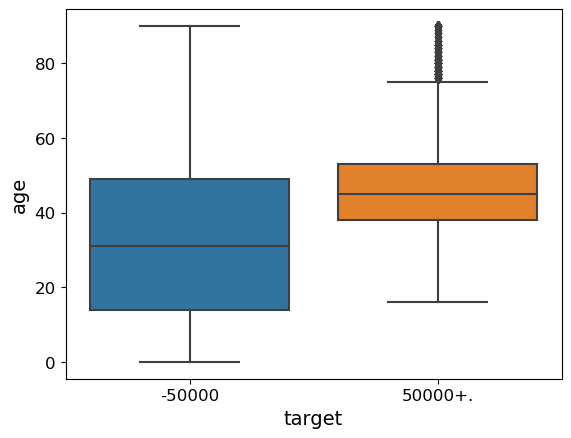

In [22]:
sns.boxplot(x='target',y='age',data=df_dropped)

In [30]:
df_dropped['income_flag']=df_dropped['target'].map({'-50000':0,'50000+.':1})

In [31]:
df2 = df_dropped.copy()

In [33]:
df2['income_flag'].value_counts()

0    187141
1     12382
Name: income_flag, dtype: int64

In [47]:
# only 6% of population has income over 50k
df2['income_flag'].describe()

count    199523.000000
mean          0.062058
std           0.241261
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: income_flag, dtype: float64

In [35]:
df2 = df2.drop(["target"], axis= 1)

In [36]:
df2.groupby('class_of_worker')['income_flag'].mean().sort_values(ascending=False)

class_of_worker
Self-employed-incorporated        0.347320
Federal government                0.204103
Self-employed-not incorporated    0.129070
State government                  0.114739
Local government                  0.108813
Private                           0.101655
Without pay                       0.006061
Never worked                      0.004556
Name: income_flag, dtype: float64

<AxesSubplot:xlabel='class_of_worker'>

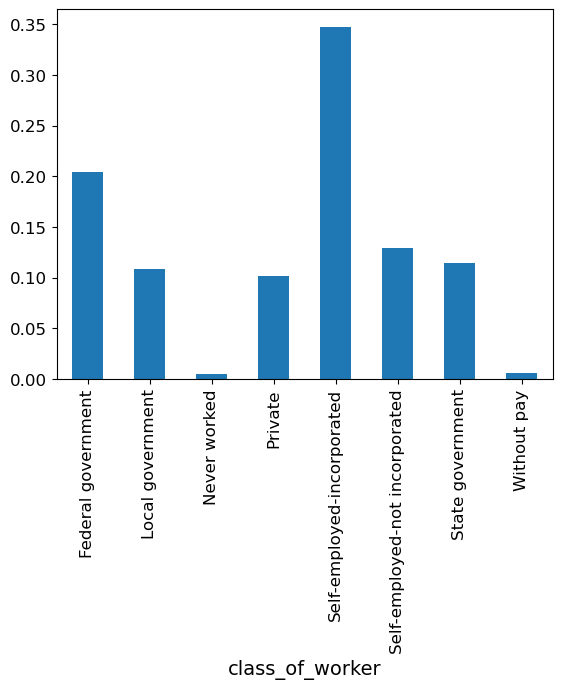

In [39]:
df2.groupby('class_of_worker').income_flag.mean().plot(kind='bar')

In [56]:
df2['class_of_worker'].value_counts()
# won't show the 50% that have missing values

Private                           72028
Self-employed-not incorporated     8445
Local government                   7784
State government                   4227
Self-employed-incorporated         3265
Federal government                 2925
Never worked                        439
Without pay                         165
Name: class_of_worker, dtype: int64

In [41]:
# check out the rest of the categorical variables
df2.groupby('detailed_industry_recode')['income_flag'].mean().sort_values(ascending=False)

detailed_industry_recode
20    0.468750
26    0.377953
25    0.271218
3     0.259325
15    0.254425
49    0.247541
13    0.235818
14    0.233898
45    0.232932
30    0.228620
16    0.224490
51    0.222222
31    0.217317
12    0.208148
47    0.190998
34    0.190235
11    0.183673
35    0.175444
23    0.175238
50    0.174296
8     0.160000
32    0.153504
46    0.139037
37    0.129289
42    0.128123
9     0.125881
41    0.122351
24    0.119760
29    0.113091
43    0.107570
7     0.106635
48    0.099693
27    0.095847
4     0.089071
18    0.076605
17    0.076433
19    0.069094
40    0.068443
5     0.065099
38    0.060773
2     0.059654
1     0.056832
28    0.055944
6     0.052347
21    0.048301
33    0.046221
22    0.040966
39    0.035751
44    0.032954
0     0.008998
36    0.005291
10    0.000000
Name: income_flag, dtype: float64

In [42]:
df2['detailed_industry_recode'].value_counts()

0     100684
33     17070
43      8283
4       5984
42      4683
45      4482
29      4209
37      4022
41      3964
32      3596
35      3380
39      2937
34      2765
44      2549
2       2196
11      1764
50      1704
40      1651
47      1644
38      1629
24      1503
12      1350
19      1346
30      1181
31      1178
25      1084
9        993
22       952
36       945
13       899
1        827
48       652
27       626
49       610
3        563
21       559
6        554
5        553
8        550
16       539
23       525
18       483
15       452
7        422
14       295
46       187
17       157
28       143
26       127
51        36
20        32
10         4
Name: detailed_industry_recode, dtype: int64

In [43]:
df2.groupby('detailed_occupation_recode')['income_flag'].mean().sort_values(ascending=False)

detailed_occupation_recode
7     0.683995
11    0.659341
4     0.497801
5     0.370760
6     0.349206
2     0.322179
18    0.274238
17    0.271598
9     0.269648
1     0.244485
46    0.222222
15    0.212270
3     0.200000
16    0.175327
8     0.172478
28    0.155930
21    0.151970
12    0.136826
14    0.129828
45    0.116279
33    0.106466
10    0.102634
35    0.095644
39    0.092429
43    0.083936
34    0.074037
22    0.065693
25    0.061278
20    0.056338
38    0.054945
13    0.052714
37    0.038496
36    0.035947
40    0.030794
19    0.025494
26    0.024090
24    0.023281
42    0.017205
23    0.017099
41    0.016960
32    0.015430
44    0.015075
30    0.014233
31    0.010374
0     0.008998
29    0.005485
27    0.002564
Name: income_flag, dtype: float64

In [44]:
df2['detailed_occupation_recode'].value_counts()

0     100684
2       8756
26      7887
19      5413
29      5105
36      4145
34      4025
10      3683
16      3445
23      3392
12      3340
33      3325
3       3195
35      3168
38      3003
31      2699
32      2398
37      2234
8       2151
42      1918
30      1897
24      1847
17      1771
28      1661
41      1592
44      1592
43      1382
4       1364
13      1271
18      1083
39      1017
14       932
5        855
15       815
27       780
25       767
9        738
7        731
11       637
40       617
1        544
21       533
6        441
22       411
45       172
20        71
46        36
Name: detailed_occupation_recode, dtype: int64

In [45]:
df2.groupby('education')['income_flag'].mean().sort_values(ascending=False)

education
Prof school degree (MD DDS DVM LLB JD)    0.540435
Doctorate degree(PhD EdD)                 0.520190
Masters degree(MA MS MEng MEd MSW MBA)    0.311573
Bachelors degree(BA AB BS)                0.197080
Associates degree-academic program        0.094430
Associates degree-occup /vocational       0.077081
Some college but no degree                0.064234
High school graduate                      0.038817
12th grade no diploma                     0.015992
11th grade                                0.010180
7th and 8th grade                         0.008992
10th grade                                0.008204
1st 2nd 3rd or 4th grade                  0.007226
5th or 6th grade                          0.006713
9th grade                                 0.006100
Less than 1st grade                       0.001221
Children                                  0.000000
Name: income_flag, dtype: float64

In [46]:
df2.groupby('marital_stat')['income_flag'].mean().sort_values(ascending=False)

marital_stat
Married-civilian spouse present    0.113984
Divorced                           0.083871
Married-spouse absent              0.063241
Separated                          0.045665
Widowed                            0.031540
Married-A F spouse present         0.022556
Never married                      0.012916
Name: income_flag, dtype: float64

In [71]:
df2['marital_stat'].value_counts()

Never married                      86485
Married-civilian spouse present    84222
Divorced                           12710
Widowed                            10463
Separated                           3460
Married-spouse absent               1518
Married-A F spouse present           665
Name: marital_stat, dtype: int64

In [48]:
df2.groupby('major_industry_code')['income_flag'].mean().sort_values(ascending=False)

major_industry_code
Mining                                 0.259325
Other professional services            0.232932
Communications                         0.228620
Armed Forces                           0.222222
Utilities and sanitary services        0.217317
Finance insurance and real estate      0.182099
Public administration                  0.179393
Manufacturing-durable goods            0.165724
Wholesale trade                        0.153504
Forestry and fisheries                 0.139037
Medical except hospital                0.128123
Manufacturing-nondurable goods         0.124112
Hospital services                      0.122351
Transportation                         0.113091
Business and repair services           0.109538
Education                              0.107570
Construction                           0.089071
Entertainment                          0.068443
Agriculture                            0.058882
Retail trade                           0.046221
Personal services ex

In [54]:
df2['major_industry_code'].value_counts()

Not in universe or children            100684
Retail trade                            17070
Manufacturing-durable goods              9015
Education                                8283
Manufacturing-nondurable goods           6897
Finance insurance and real estate        6145
Construction                             5984
Business and repair services             5651
Medical except hospital                  4683
Public administration                    4610
Other professional services              4482
Transportation                           4209
Hospital services                        3964
Wholesale trade                          3596
Agriculture                              3023
Personal services except private HH      2937
Social services                          2549
Entertainment                            1651
Communications                           1181
Utilities and sanitary services          1178
Private household services                945
Mining                            

In [49]:
df2.groupby('major_occupation_code')['income_flag'].mean().sort_values(ascending=False)

major_occupation_code
Executive admin and managerial           0.287555
Professional specialty                   0.249283
Armed Forces                             0.222222
Protective services                      0.155930
Sales                                    0.129339
Technicians and related support          0.119616
Precision production craft & repair      0.090797
Transportation and material moving       0.064428
Farming forestry and fishing             0.050858
Machine operators assmblrs & inspctrs    0.036840
Adm support including clerical           0.030060
Handlers equip cleaners etc              0.019142
Other service                            0.009918
Private household services               0.002564
Name: income_flag, dtype: float64

In [60]:
df2['major_occupation_code'].value_counts()

Adm support including clerical           14837
Professional specialty                   13940
Executive admin and managerial           12495
Other service                            12099
Sales                                    11783
Precision production craft & repair      10518
Machine operators assmblrs & inspctrs     6379
Handlers equip cleaners etc               4127
Transportation and material moving        4020
Farming forestry and fishing              3146
Technicians and related support           3018
Protective services                       1661
Private household services                 780
Armed Forces                                36
Name: major_occupation_code, dtype: int64

In [50]:
df2.groupby('race')['income_flag'].mean().sort_values(ascending=False)

race
Asian or Pacific Islander      0.073693
White                          0.067350
Black                          0.026451
Other                          0.024884
Amer Indian Aleut or Eskimo    0.021768
Name: income_flag, dtype: float64

In [51]:
df2['race'].value_counts()

White                          167365
Black                           20415
Asian or Pacific Islander        5835
Other                            3657
Amer Indian Aleut or Eskimo      2251
Name: race, dtype: int64

In [52]:
df2.groupby('hispanic_origin')['income_flag'].mean().sort_values(ascending=False)
# can probably go ahead and drop hispanic origin and race

hispanic_origin
All other                    0.068450
Cuban                        0.054174
Other Spanish                0.032596
Do not know                  0.026144
Mexican-American             0.021290
Central or South American    0.020539
Puerto Rican                 0.020525
Chicano                      0.019737
Mexican (Mexicano)           0.011335
Name: income_flag, dtype: float64

In [53]:
df2.groupby('sex')['income_flag'].mean().sort_values(ascending=False)

sex
Male      0.101728
Female    0.025610
Name: income_flag, dtype: float64

In [57]:
# Create X and y variables, income as the dependent variable
X = df2.drop("income_flag", axis= 1)
y = df2["income_flag"]

In [58]:
# Create train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=0)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 149642 observation with 34 features
test data has 49881 observation with 34 features


In [61]:
# Writing function to deal with each variable one by one to avoid encoding error 
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ["class_of_worker", "marital_stat", "major_occupation_code", "race"]
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149642 entries, 0 to 149641
Data columns (total 66 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   age                                                          149642 non-null  int64  
 1   detailed_industry_recode                                     149642 non-null  int64  
 2   detailed_occupation_recode                                   149642 non-null  int64  
 3   education                                                    149642 non-null  object 
 4   wage_per_hour                                                149642 non-null  int64  
 5   major_industry_code                                          149642 non-null  object 
 6   hispanic_origin                                              148985 non-null  object 
 7   sex                                                          1496

In [69]:
#income_data_america = income_data[income_data["native-country"].isin(["United-States", "Canada"])]

df2.loc[df2['major_occupation_code'].isin(["Executive admin and managerial", "Professional specialty",
                                          "Armed Forces", "Protective services", "Sales"]), 'high_paying_occupation_code'] = 1
df2.loc[~df2['major_occupation_code'].isin(["Executive admin and managerial", "Professional specialty",
                                          "Armed Forces", "Protective services", "Sales"]), 'high_paying_occupation_code'] = 0
df2.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,marital_stat,major_industry_code,major_occupation_code,race,...,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_flag,high_paying_job,high_paying_occupation_code
0,73,NaN,0,0,High school graduate,0,Widowed,Not in universe or children,NaN,White,...,United-States,United-States,Native- Born in the United States,0,2,0,95,0,0.0,0.0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Divorced,Construction,Precision production craft & repair,White,...,United-States,United-States,Native- Born in the United States,0,2,52,94,0,0.0,0.0
2,18,NaN,0,0,10th grade,0,Never married,Not in universe or children,NaN,Asian or Pacific Islander,...,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,2,0,95,0,0.0,0.0
3,9,NaN,0,0,Children,0,Never married,Not in universe or children,NaN,White,...,United-States,United-States,Native- Born in the United States,0,0,0,94,0,0.0,0.0
4,10,NaN,0,0,Children,0,Never married,Not in universe or children,NaN,White,...,United-States,United-States,Native- Born in the United States,0,0,0,94,0,0.0,0.0


In [70]:
df2.loc[df2['capital_gains'] > 0, 'has_capital_gains'] = 1
df2.loc[df2['capital_gains'] <= 0, 'has_capital_gains'] = 0
df2.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,marital_stat,major_industry_code,major_occupation_code,race,...,country_of_birth_self,citizenship,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_flag,high_paying_job,high_paying_occupation_code,has_capital_gains
0,73,NaN,0,0,High school graduate,0,Widowed,Not in universe or children,NaN,White,...,United-States,Native- Born in the United States,0,2,0,95,0,0.0,0.0,0.0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Divorced,Construction,Precision production craft & repair,White,...,United-States,Native- Born in the United States,0,2,52,94,0,0.0,0.0,0.0
2,18,NaN,0,0,10th grade,0,Never married,Not in universe or children,NaN,Asian or Pacific Islander,...,Vietnam,Foreign born- Not a citizen of U S,0,2,0,95,0,0.0,0.0,0.0
3,9,NaN,0,0,Children,0,Never married,Not in universe or children,NaN,White,...,United-States,Native- Born in the United States,0,0,0,94,0,0.0,0.0,0.0
4,10,NaN,0,0,Children,0,Never married,Not in universe or children,NaN,White,...,United-States,Native- Born in the United States,0,0,0,94,0,0.0,0.0,0.0


In [ ]:
# from what I can tell, we seem to have an issue with there not being many 50k+ = 1
# and the ones that are 50k+ = 1, tend to have lots of missing, 0, Not in universe data
# so it will probably be a pretty small subset of data that we actually use for signal